<a href="https://colab.research.google.com/github/adityaras/Reinforcement-Learning-CSE564-M2020/blob/master/HW1/RL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [24]:
sum_rt=[0]*1000
for j in range(2000):  
  q_star=[]
  for i1 in range(10):
    q_star.append(np.random.normal(0,1))
  Q_t=[0]*10
  times_picked=[0]*10
  #epsilon=0.1
  for i in range(1000):
    prob=random.randint(1,10)
    if prob == 1:
      ind=random.randint(0,9)    
    else:
      ind=np.argmax(Q_t)
    times_picked[ind]+=1
    Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(np.random.normal(q_star[ind],1)/times_picked[ind])
    sum_rt[i]+=np.random.normal(q_star[ind],1)
for k in range(1000):
  sum_rt[k]=sum_rt[k]/2000



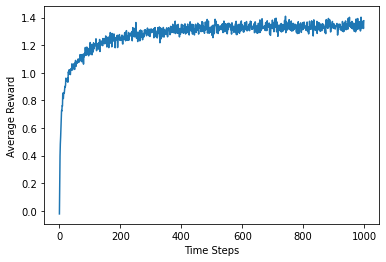

In [25]:
plt.plot(sum_rt)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.show()